[학습목표]<br>
seaborn으로 산점도를 그릴 수 있다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']='False'

# 샘플데이터

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# total_bill과 tip의 관계

## 멧플롯립으로 그리기
plt.scatter(x,y)

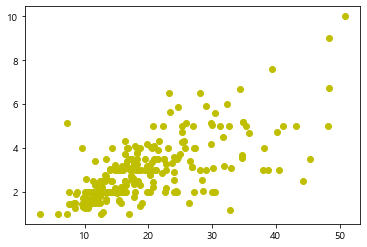

In [9]:
plt.scatter(tips['total_bill'], tips['tip'], c='y')

plt.show()

## 요일 구분

* total_bill에 따른 tip의 분포 - 색상으로 요일 표시<br>
'Sun':'red'<br>
'Sat':'blue'<br>
'Thur':'green'<br>
'Fri':'yello'


In [10]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

### 요일별 서브셋 만들기

In [14]:
tips_Sun = tips[tips['day']=='Sun']

In [15]:
tips_Sat = tips[tips['day']=='Sat']

In [16]:
tips_Thur = tips[tips['day']=='Thur']

In [17]:
tips_Fri = tips[tips['day']=='Fri']

### 시각화하기

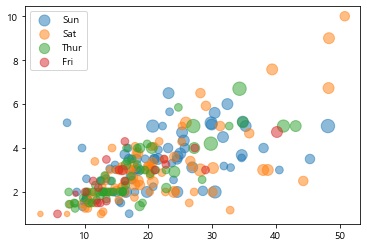

In [28]:
plt.scatter(tips_Sun['total_bill'], tips_Sun['tip'], label='Sun', s=tips_Sun['size']*30, alpha=0.5)
plt.scatter(tips_Sat['total_bill'], tips_Sat['tip'], label='Sat',s=tips_Sat['size']*30, alpha=0.5)
plt.scatter(tips_Thur['total_bill'], tips_Thur['tip'], label='Thur', s=tips_Thur['size']*30, alpha=0.5)
plt.scatter(tips_Fri['total_bill'], tips_Fri['tip'], label='Fri', s=tips_Fri['size']*30, alpha=0.5)
plt.legend()

plt.show()

# 라벨링을 해주면 알아서 랜덤으로 색에 차이를 준다.
# s는 사이즈, alpha는 투명도

## seaborn으로 그리기
* <b>`sns.scatterplot(data=데이터프레임, x=x축컬럼, y=y축컬럼)`</b>

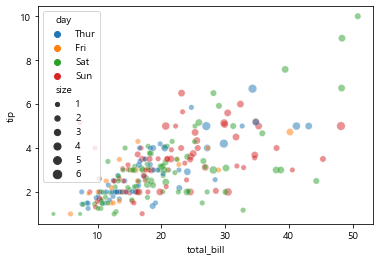

In [32]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', size='size', alpha=0.5)

plt.show()

# seaborn에서는 hue로 각각을 구별해주고 범례도 표시해준다.
# size는 알아서 적절히 사이즈를 정해준다.

In [ ]:
# ----------------------------------------

[학습목표]<br>
Seaborn으로 선그래프를 그릴 수 있다.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

# 샘플데이터

In [35]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [36]:
flights.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [37]:
flights.shape

(144, 3)

In [38]:
# 연도별 데이터 수
flights['year'].value_counts()

1949    12
1950    12
1951    12
1952    12
1953    12
1954    12
1955    12
1956    12
1957    12
1958    12
1959    12
1960    12
Name: year, dtype: int64

In [39]:
# 월별 데이터 수
flights['month'].value_counts()

Jan    12
Feb    12
Mar    12
Apr    12
May    12
Jun    12
Jul    12
Aug    12
Sep    12
Oct    12
Nov    12
Dec    12
Name: month, dtype: int64

# 연도별 승객수의 변화

## matplotlib으로 시각화
* plt.plot(x,y)

### 데이터 가공

In [52]:
# 연도별 승객의 수
# 시간의 흐름에 따라 변화하는 값들은 '선'그래프로 시각화 한다.
# 컬럼 수가 여러개인 데이터에서 'OO별, OO의 합계or수' 를 시각화하려면 그룹핑으로 데이터 가공처리를 해야한다

flights_year = flights.groupby('year')['passengers'].sum() # -> 시리즈로 생성
# flights.groupby('year').agg(sum=('passengers','sum')) # -> 데이터 프레임으로 만듦

### 시각화

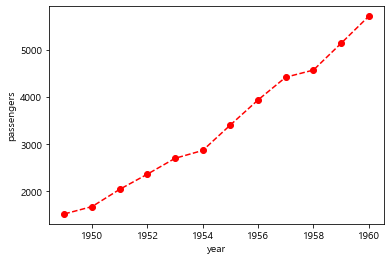

In [54]:
plt.plot(flights_year, 'ro--')
# plt.plot(flights_year.index, flights_year)

plt.xlabel('year')
plt.ylabel('passengers')
plt.show()

## seaborn
* `sns.lineplot(data=데이터프레임, x=x축컬럼, y=y축컬럼, estimator=통계함수)`<br>
estimator를 생략하면 평균으로 통계를 적용함

* 전체 데이터로 차트를 그리면 신뢰구간 표시

<AxesSubplot:xlabel='year', ylabel='passengers'>

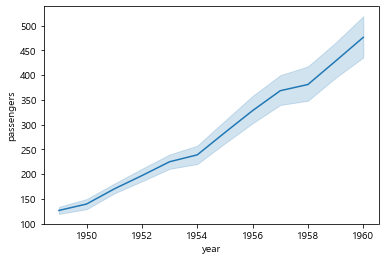

In [55]:
sns.lineplot(data=flights, x='year', y='passengers') # 번지듯이 퍼져있는 것이 '신뢰구간'

<AxesSubplot:xlabel='year', ylabel='passengers'>

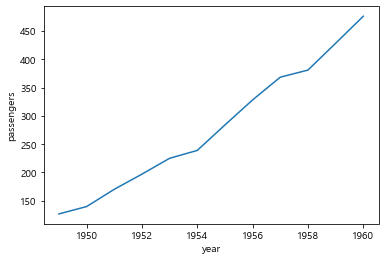

In [57]:
sns.lineplot(data=flights, x='year', y='passengers', ci=None)
# plt으로 그린 것과 y축 값이 다른데, sns는 기본적으로 평균값을 나타낸다.

<AxesSubplot:xlabel='year', ylabel='passengers'>

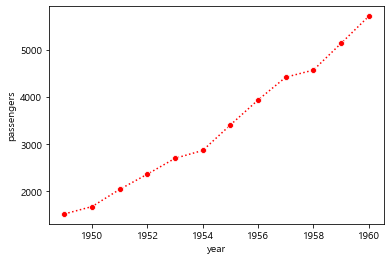

In [60]:
sns.lineplot(data=flights, x='year', y='passengers', ci=None, estimator=sum,
            color='r', marker='o', ls=':')

# 연도-월별 승객수의 변화

## matplotlib으로 시각화

### 데이터 가공

In [63]:
# flights.groupby(['year','month'])['passengers'].sum()
flights_pivot = flights.pivot(index='year',columns='month',values='passengers')

### 시각화

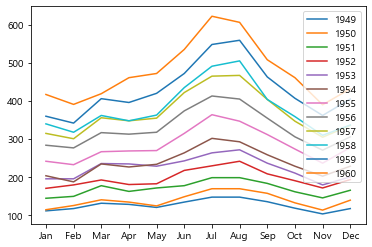

In [69]:
for i in range(12):
    plt.plot(flights_pivot.iloc[i], label=flights_pivot.index[i])
plt.legend()
plt.show()

## seaborn으로 시각화

<AxesSubplot:xlabel='month', ylabel='passengers'>

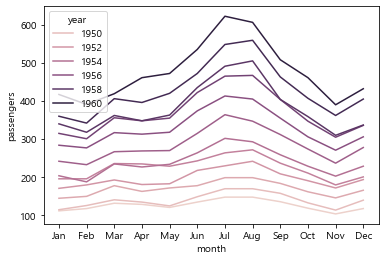

In [73]:
sns.lineplot(data=flights, x='month', y='passengers', hue='year', ci=None)
# matplotlib을 기반으로 한 seaborn이기 때문에, matplotlib을 잘 공부해서 활용하면
# 더 좋은 결과를 얻을 것이다.